In [87]:
# Librerías para manipulación de datos y visualización
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Configuración para que se muestren bien los gráficos
%matplotlib inline
print("Librerías importadas correctamente.")

Librerías importadas correctamente.


In [88]:
 # Cargar los datos
df = pd.read_csv('../data/train.csv', index_col='Id')

# Mostrar las primeras 5 filas para confirmar la carga
print("Primeras 5 filas del dataset:")
df.head()

Primeras 5 filas del dataset:


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [89]:
#hago un dataframe numerico
dfNum=df.select_dtypes(include=['float64', 'int64'])
#extraigo las columnas que no son numéricas
dfCat = df.select_dtypes(exclude=['float64', 'int64'])
Categorias=dfCat.columns.tolist()




# Calcular la matriz de correlación solo para variables numéricas
corr_matrix = dfNum.corr()

#Ordenear poor distancia a correlacion 0
absOrder = corr_matrix['SalePrice'].abs().sort_values(ascending=False)
corr_for_SalesPrice=corr_matrix.loc[absOrder.index]["SalePrice"].drop('SalePrice')


In [90]:
corr_for_SalesPrice
#n es la cantidad de variables a usar para el regression
n=5

In [91]:
corr_for_SalesPrice.index

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd',
       'GarageYrBlt', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage',
       'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'HalfBath', 'LotArea',
       'BsmtFullBath', 'BsmtUnfSF', 'BedroomAbvGr', 'KitchenAbvGr',
       'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MSSubClass', 'OverallCond',
       'MoSold', '3SsnPorch', 'YrSold', 'LowQualFinSF', 'MiscVal',
       'BsmtHalfBath', 'BsmtFinSF2'],
      dtype='object')

In [92]:
df_pred=df.copy()

In [94]:
for col in corr_for_SalesPrice.index[:n].tolist():
    df_pred[col]=df_pred[col].fillna(df_pred[col].median())

y=df_pred['SalePrice']
df_pred[corr_for_SalesPrice.index[:n].tolist() + ['SalePrice']].head()



,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,SalePrice
Id,,,,,,
1,7,1710,2,548,856,208500
2,6,1262,2,460,1262,181500
3,7,1786,2,608,920,223500
4,7,1717,3,642,756,140000
5,8,2198,3,836,1145,250000


In [ ]:
df_pred = df_pred[corr_for_SalesPrice.index[:n].tolist()]

In [ ]:
df_pred.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF
Id,,,,,
1,7,1710,2,548,856
2,6,1262,2,460,1262
3,7,1786,2,608,920
4,7,1717,3,642,756
5,8,2198,3,836,1145


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_pred,y, test_size=0.2, random_state=42)
x_test

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF
Id,,,,,
893,6,1068,1,264,1059
1106,8,2622,2,712,1463
414,5,1028,2,360,1008
523,6,1664,2,420,1004
1037,9,1620,3,912,1620
...,...,...,...,...,...
480,4,1131,2,672,907
1362,7,1530,2,430,1530
803,7,1456,2,410,728


In [ ]:
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_hat=reg.predict(x_train)

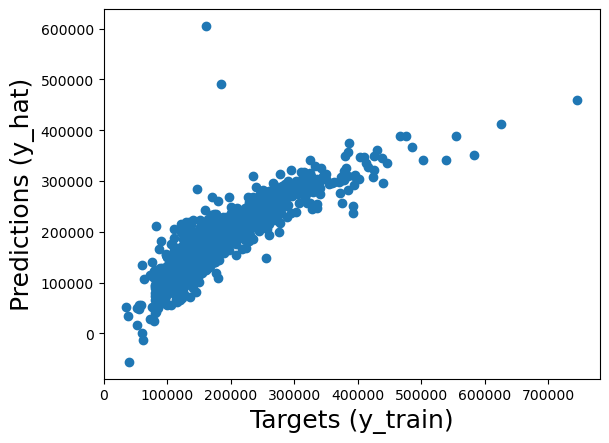

In [ ]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

In [ ]:
import joblib
joblib.dump(reg, 'Model_1.joblib')

['Model_1.joblib']